###2 Printing Cylinders

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import seaborn as sns
import umap

In [2]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [65]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data mining/project/Data_with_1_Printing_Gap.csv")

In [66]:
df = df.head(19000)

In [70]:
# creating list of features
features = ["Rwf", "ECT_Avg","ECT1","ECT2","ECT3","ECT4","ECT5","Speed_Act","Feed_Roll_Gap","GLWeigth(Grammage)","BMWeigth(Grammage)","BLWeigth(Grammage)","CMWeigth(Grammage)","CLWeigth(Grammage)","Finished_Product_Wid","Finished_Product_Leg","Finished_Product_Hig","New_Printing_Gap_1","New_Average_Printing_Gap"]

In [71]:
#target variable
target = ["BCT_Avg"]

### Standardizing the data

In [72]:
# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,target].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

###Correlation of the standardized data before applying PCA

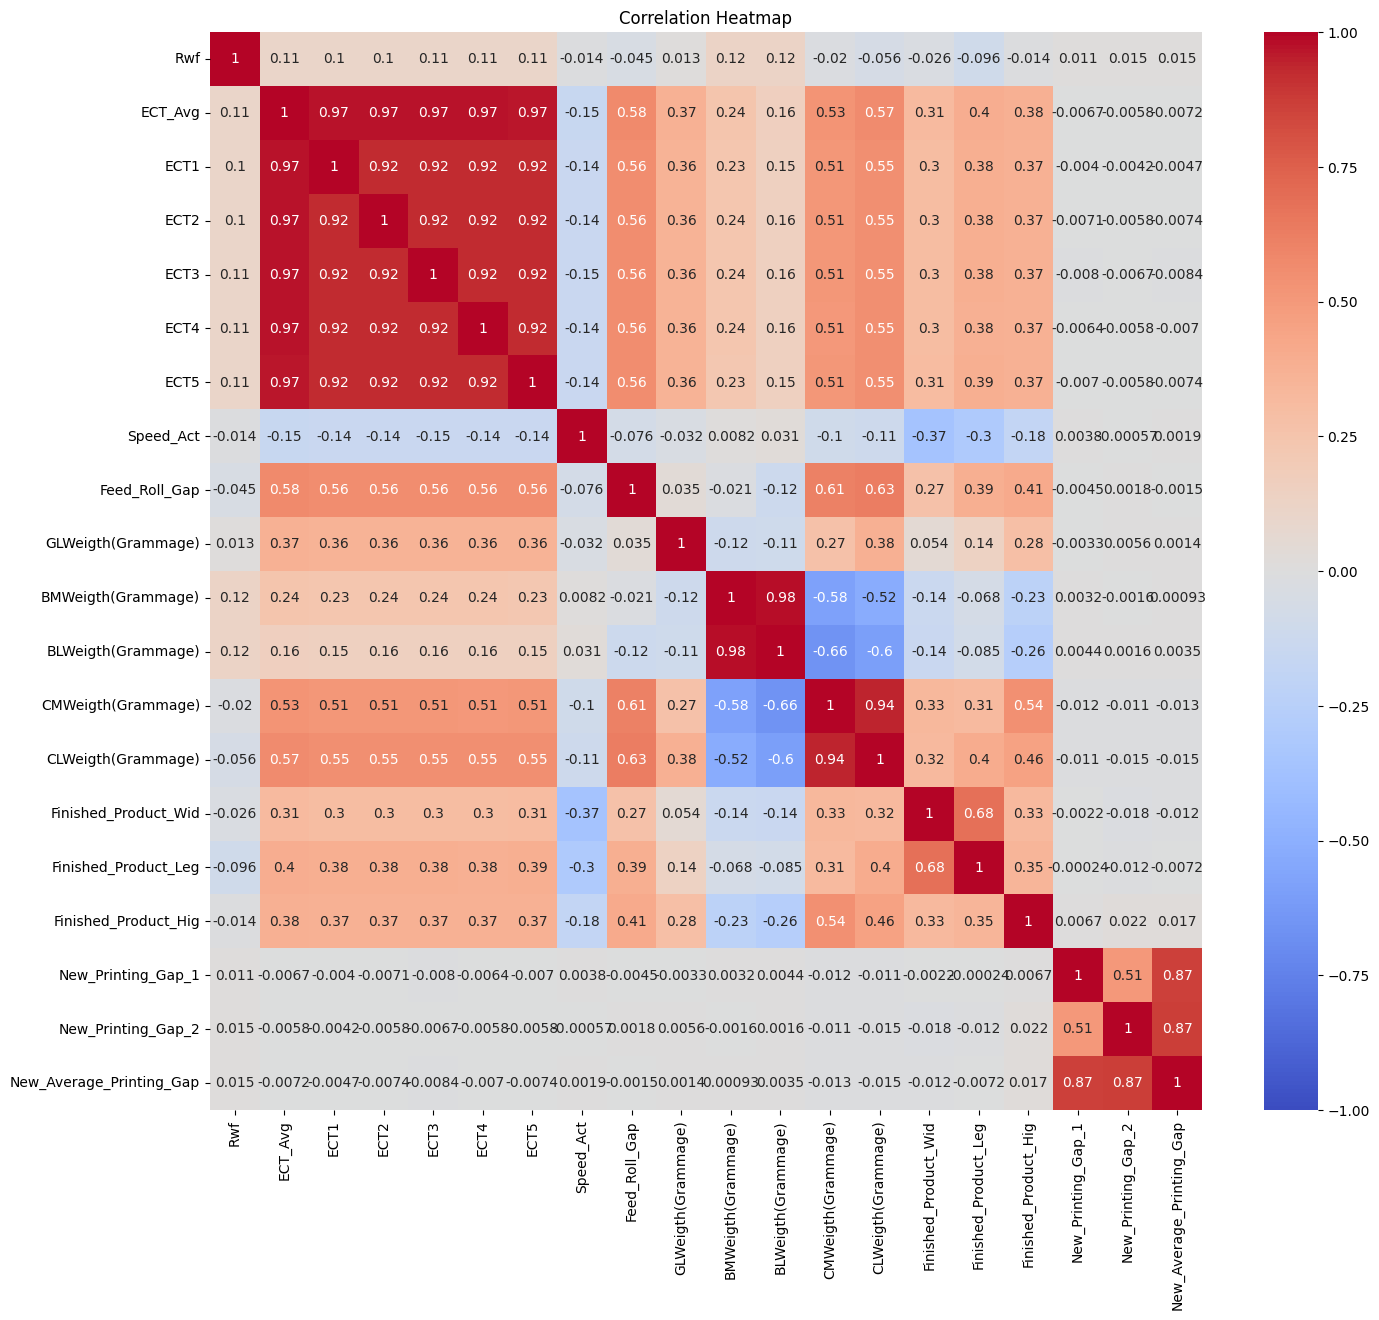

In [ ]:
# Convert the standardized data back into a DataFrame
x_df = pd.DataFrame(x, columns=features)

# Calculate the correlation matrix
correlation_matrix = x_df.corr()

# Create the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

### PCA

In [73]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [74]:
principalDf.head()

,PC1,PC2
0,-0.863049,-2.301611
1,-3.109646,1.458244
2,-0.934542,-2.373680
3,-4.166620,1.099239
4,-2.445998,-2.639754


<Axes: >

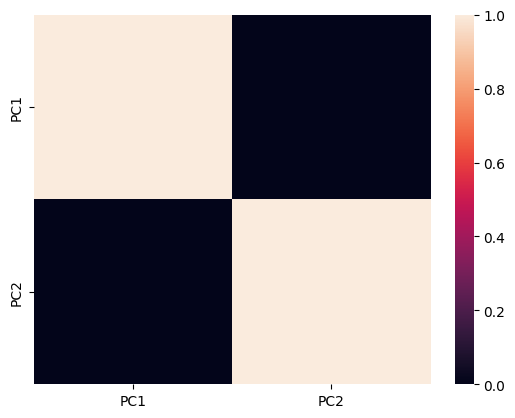

In [75]:
sns.heatmap(principalDf.corr())

In [76]:
pca.explained_variance_ratio_

array([0.34686112, 0.24216504])

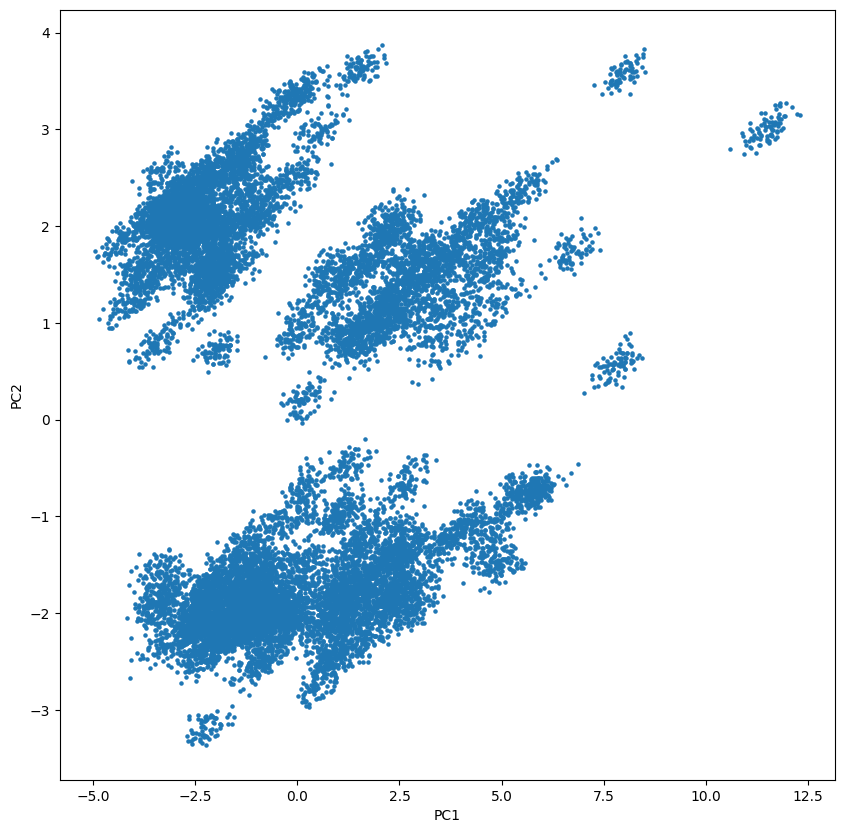

In [60]:
plt.figure(figsize=(10, 10))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Kernel PCA

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform=True, gamma=15)  # You can try other kernels like 'poly', 'sigmoid', 'linear', etc.
principalComponents_kpca = kpca.fit_transform(x)


In [ ]:
eigenvalues = principalComponents_kpca.eigenvalues_

# Calculate explained variance ratio (approximated)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print("Approximated Explained Variance Ratio:", explained_variance_ratio)


AttributeError: 'numpy.ndarray' object has no attribute 'eigenvalues_'

In [ ]:
# Compute the kernel matrix
K = kpca._get_kernel(x)

# Get eigenvalues of the kernel matrix
eigenvalues, _ = np.linalg.eigh(K)

# Sort eigenvalues in descending order
eigenvalues = eigenvalues[::-1]

# Calculate explained variance ratio (approximated)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print("Approximated Explained Variance Ratio:", explained_variance_ratio[:kpca.n_components])


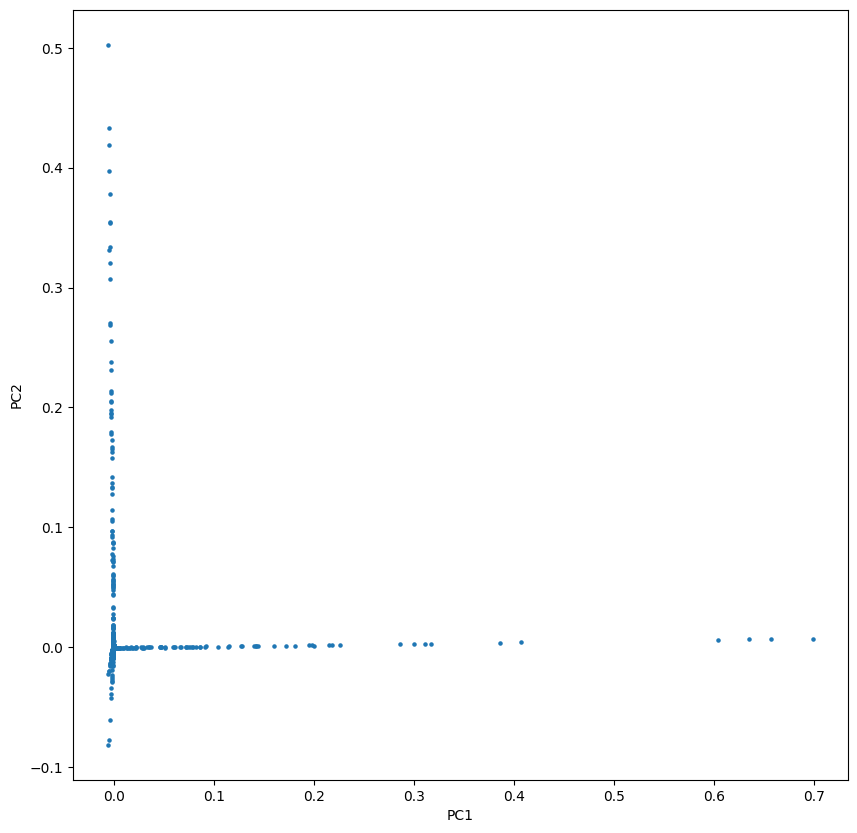

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=5)
data_kpca = kpca.fit_transform(x)
# Plot the points
plt.figure(figsize=(10, 10))
plt.scatter(data_kpca[:, 0], data_kpca[:, 1], s=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

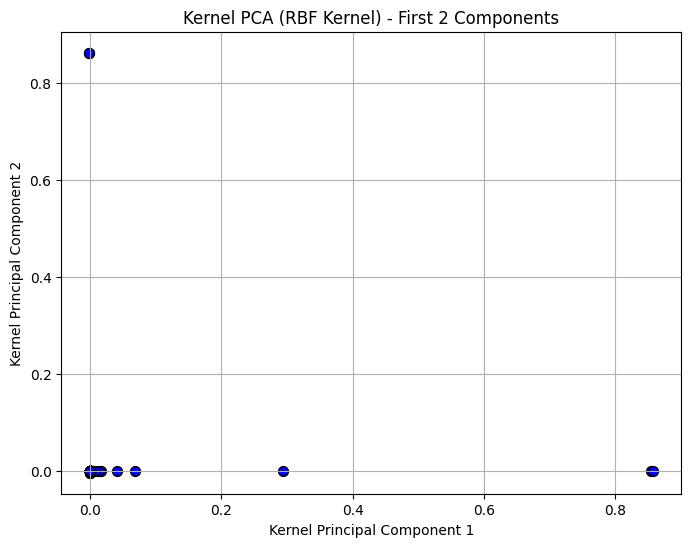

In [ ]:
# Assuming 'data_kpca' contains the 2D Kernel PCA-transformed data
plt.figure(figsize=(8, 6))

# Scatter plot of the first two kernel principal components
plt.scatter(data_kpca[:, 0], data_kpca[:, 1], c='blue', edgecolor='k', s=50)

# Add labels and title
plt.xlabel('Kernel Principal Component 1')
plt.ylabel('Kernel Principal Component 2')
plt.title('Kernel PCA (RBF Kernel) - First 2 Components')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
finalDf = pd.concat([principalDf, df[['BCT_Avg']]], axis = 1)


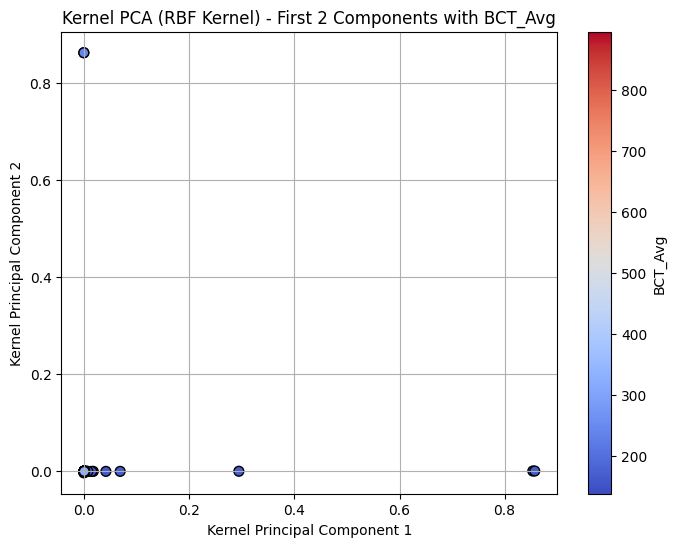

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot of the Kernel PCA components, coloring by target variable (BCT_Avg)
sc = plt.scatter(principalComponents_kpca[:, 0], principalComponents_kpca[:, 1],
                 c=y, cmap='coolwarm', edgecolor='k', s=50)

# Add colorbar to show the range of BCT_Avg values
plt.colorbar(sc, label='BCT_Avg')

# Add labels and title
plt.xlabel('Kernel Principal Component 1')
plt.ylabel('Kernel Principal Component 2')
plt.title('Kernel PCA (RBF Kernel) - First 2 Components with BCT_Avg')

# Show the plot
plt.grid(True)
plt.show()


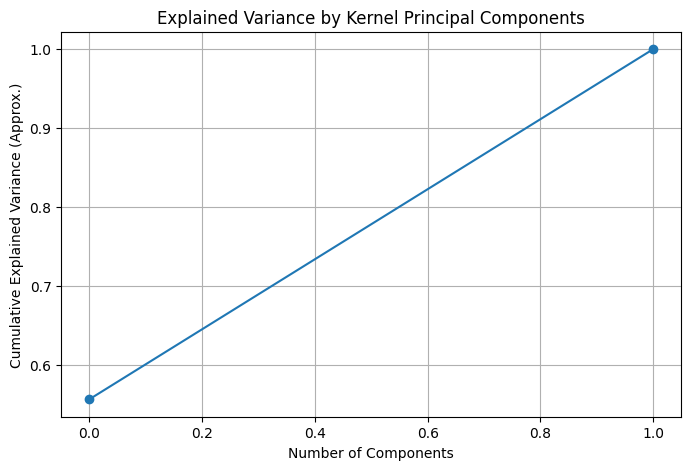

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (Approx.)')
plt.title('Explained Variance by Kernel Principal Components')
plt.grid(True)
plt.show()


### t-SNE

In [77]:
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE on the standardized data
tsne_results = tsne.fit_transform(x)

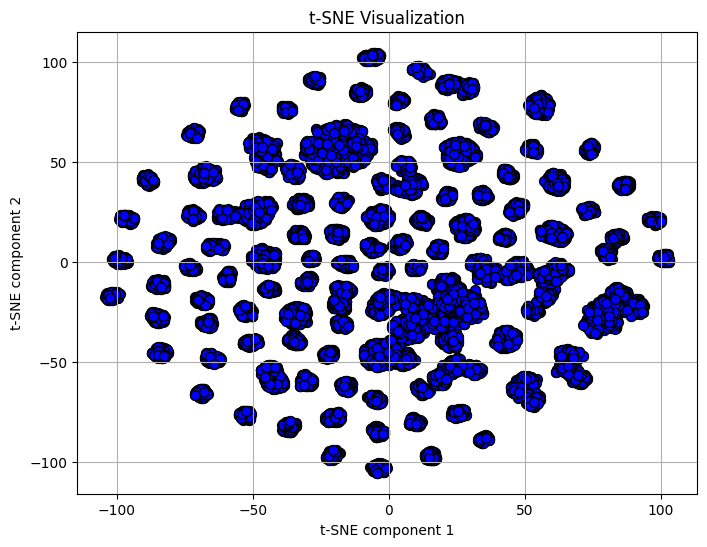

In [26]:
# Create a scatter plot of the t-SNE components
plt.figure(figsize=(8, 6))

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', edgecolor='k', s=50)

# Add labels and title
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE Visualization')

plt.grid(True)
plt.show()

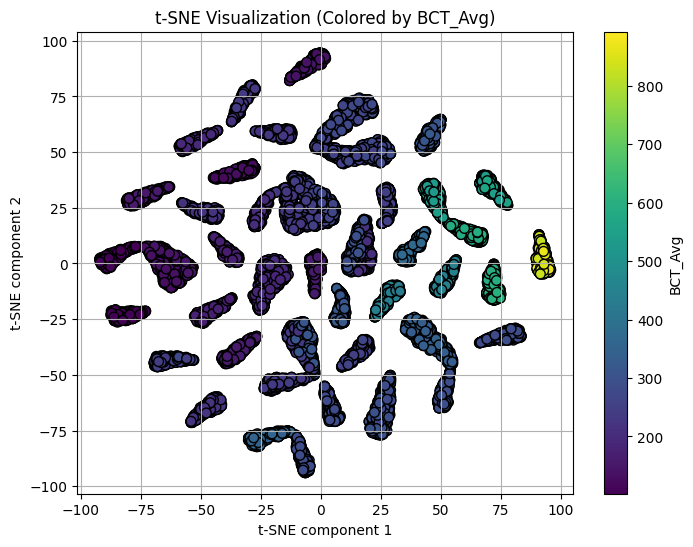

In [78]:
# Create a scatter plot of the t-SNE components, coloring by BCT_Avg
plt.figure(figsize=(8, 6))

# Assuming 'BCT_Avg' contains the actual target values for each row in 'x'
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['BCT_Avg'], cmap='viridis', edgecolor='k', s=50)

# Add color bar for reference
plt.colorbar(label='BCT_Avg')

# Add labels and title
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE Visualization (Colored by BCT_Avg)')

plt.grid(True)
plt.show()


### U-MAP

In [79]:
# Step 1: Initialize and apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)

# Step 2: Fit and transform the data
umap_results = umap_reducer.fit_transform(x)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


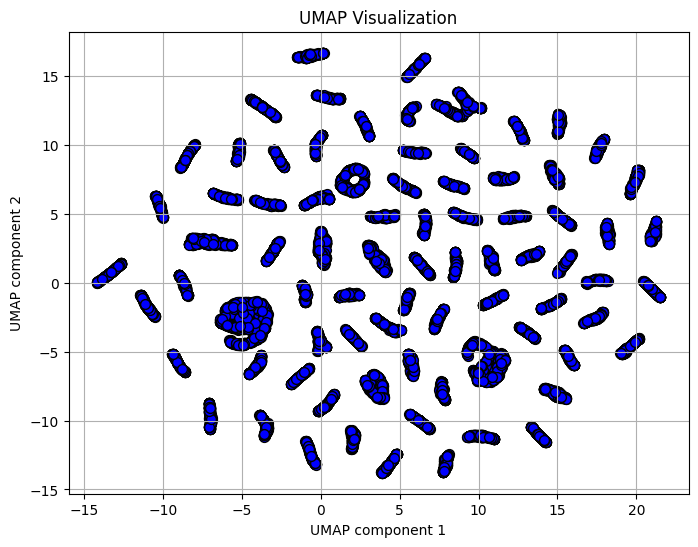

In [ ]:

# Step 3: Create a scatter plot of the UMAP components
plt.figure(figsize=(8, 6))

plt.scatter(umap_results[:, 0], umap_results[:, 1], c='blue', edgecolor='k', s=50)

# Add labels and title
plt.xlabel('UMAP component 1')
plt.ylabel('UMAP component 2')
plt.title('UMAP Visualization')

plt.grid(True)
plt.show()


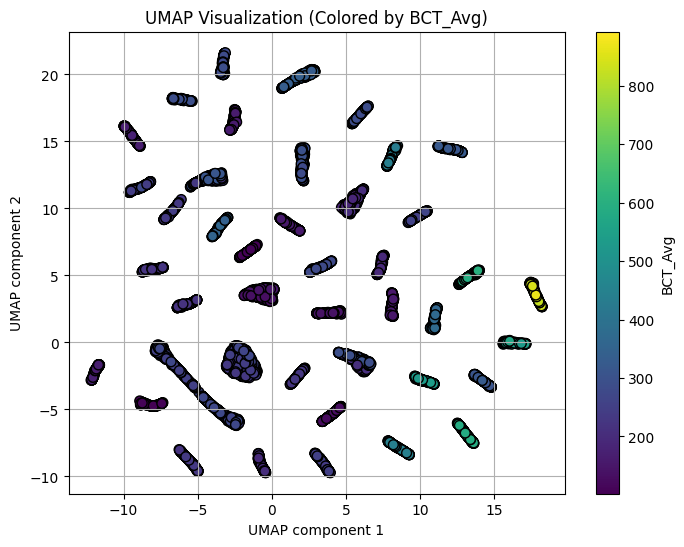

In [80]:
# Create a scatter plot of the UMAP components, coloring by BCT_Avg
plt.figure(figsize=(8, 6))

# Assuming 'BCT_Avg' contains the actual target values for each row in 'x'
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=df['BCT_Avg'], cmap='viridis', edgecolor='k', s=50)

# Add color bar for reference
plt.colorbar(label='BCT_Avg')

# Add labels and title
plt.xlabel('UMAP component 1')
plt.ylabel('UMAP component 2')
plt.title('UMAP Visualization (Colored by BCT_Avg)')

plt.grid(True)
plt.show()


###Identifying key features in the clusters

In [ ]:
df_original = df

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'tsne_results' or 'umap_results' is the 2D transformed data
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose the number of clusters based on visual inspection
clusters = kmeans.fit_predict(tsne_results)  # Or umap_results

# Add cluster labels to the original data
df = pd.DataFrame(x, columns=features)  # 'x' is your original standardized data
df['Cluster'] = clusters
# Assuming 'df_original' contains your full dataset
# Assuming 'df_original' contains your full dataset
df['BCT_Avg'] = df_original['BCT_Avg'].values  # Extract values for "BCT_Avg" from the original dataset




In [ ]:
# Group by cluster and calculate mean of each feature
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

# Optional: Display the mean target value per cluster
cluster_target_means = df.groupby('Cluster')['BCT_Avg'].mean()
print(cluster_target_means)


              Rwf   ECT_Avg      ECT1      ECT2      ECT3      ECT4      ECT5  \
Cluster                                                                         
0       -0.098721  0.173553  0.168608  0.170932  0.169301  0.162911  0.168997   
1       -0.056680  1.225134  1.187714  1.181493  1.185627  1.187135  1.193121   
2       -0.223556 -0.799587 -0.774798 -0.778640 -0.775220 -0.765887 -0.778970   
3        0.641428  0.111361  0.103138  0.112809  0.110267  0.107179  0.106056   
4       -0.437378 -0.831500 -0.800664 -0.804485 -0.807687 -0.808867 -0.806422   

         Speed_Act  Feed_Roll_Gap  GLWeigth(Grammage)  ...  \
Cluster                                                ...   
0        -0.199956       0.167992            0.728902  ...   
1        -0.193687       1.152986            0.105382  ...   
2         0.339153      -0.920456           -0.616546  ...   
3        -0.139548      -0.288913            0.047682  ...   
4         0.232729      -0.115859           -0.232374  ...  

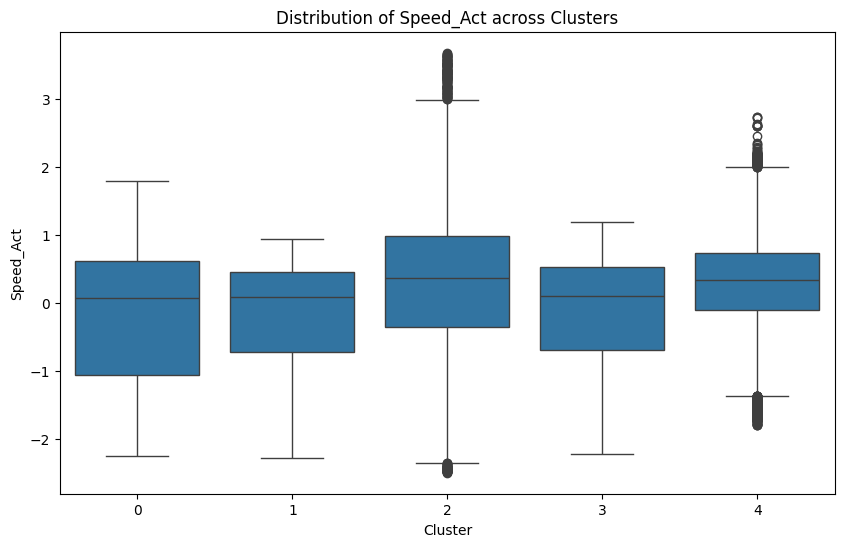

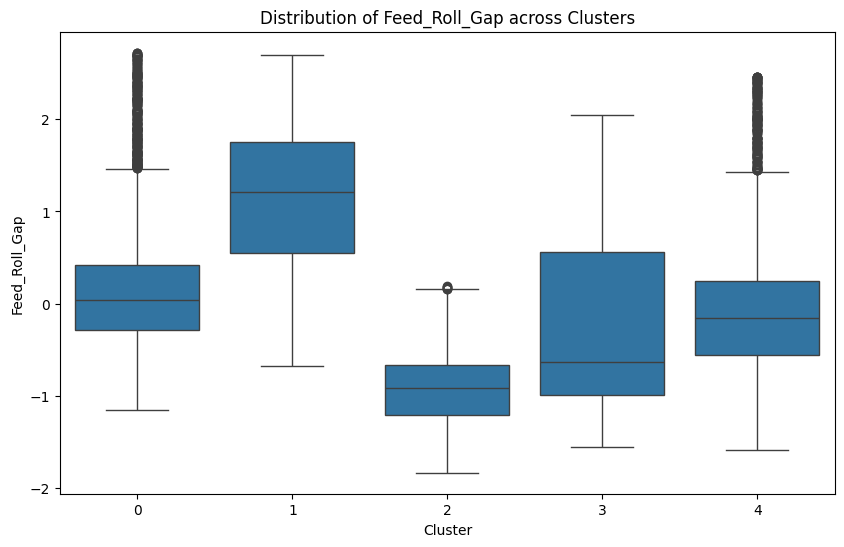

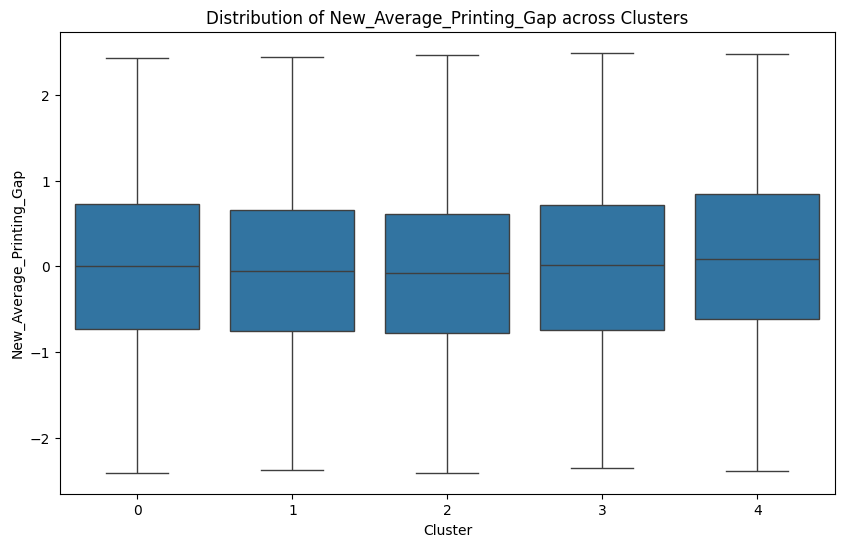

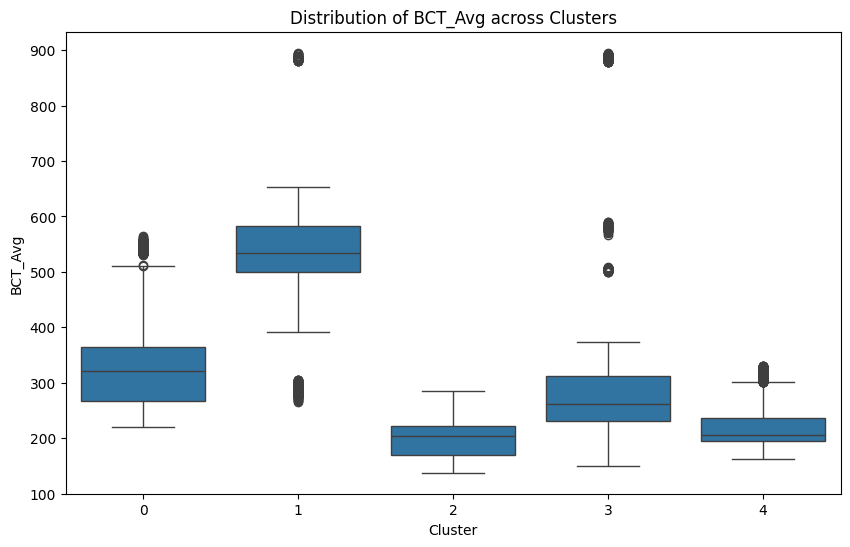

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of a few key features across clusters
key_features = ["Speed_Act", "Feed_Roll_Gap", "New_Average_Printing_Gap"]
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()

# You can also visualize the target (BCT_Avg) distribution by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='BCT_Avg', data=df)
plt.title('Distribution of BCT_Avg across Clusters')
plt.show()


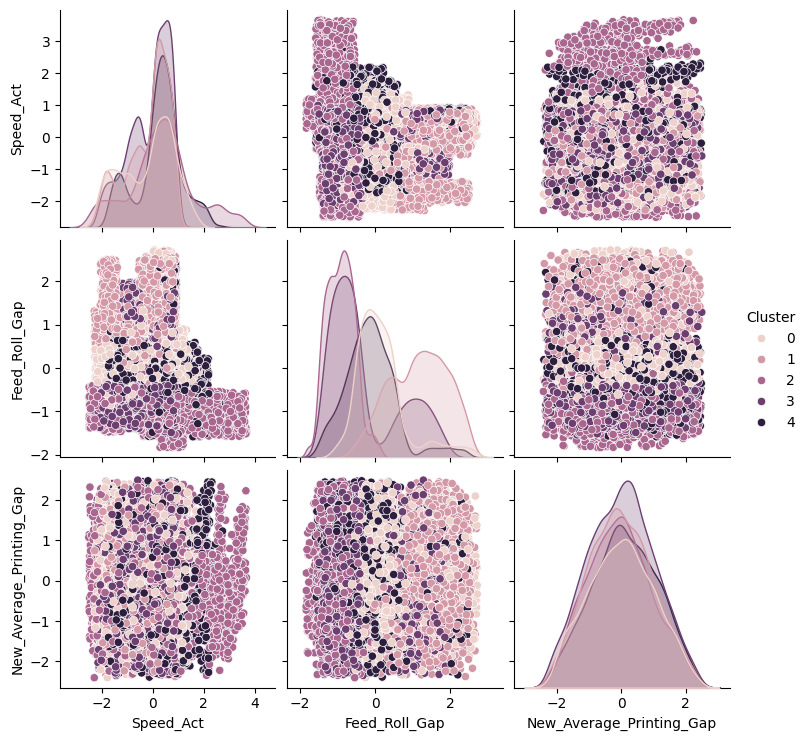

In [ ]:
# Pairplot to visualize pairwise relationships between features in different clusters
sns.pairplot(df, hue='Cluster', vars=key_features)
plt.show()


Speed_Act                  -0.183414
Feed_Roll_Gap               0.654727
New_Average_Printing_Gap   -0.017270
BCT_Avg                     1.000000
Name: BCT_Avg, dtype: float64


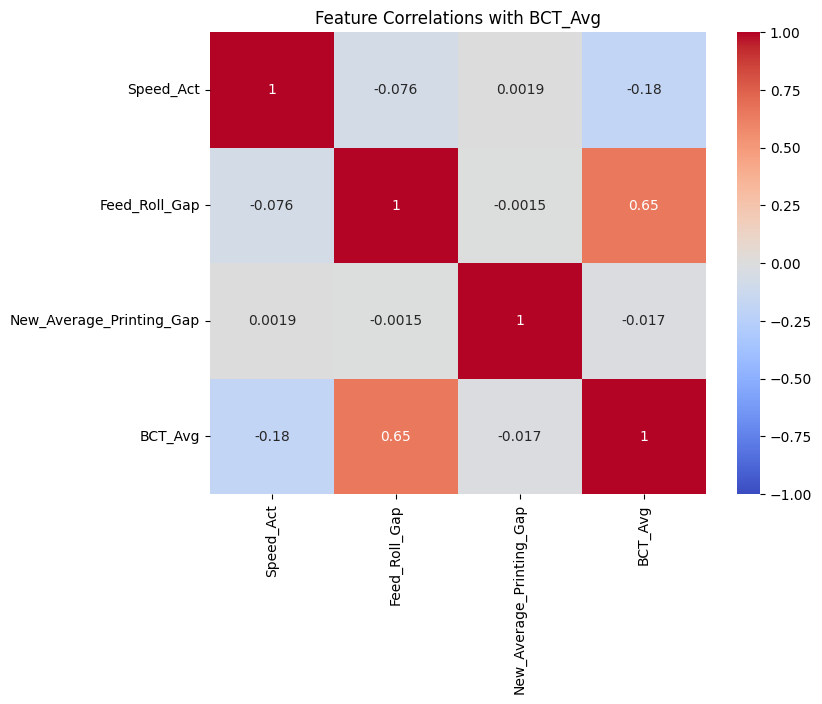

In [ ]:
# Calculate correlation between features and target
correlations = df[key_features + ['BCT_Avg']].corr()
print(correlations['BCT_Avg'])

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlations with BCT_Avg')
plt.show()


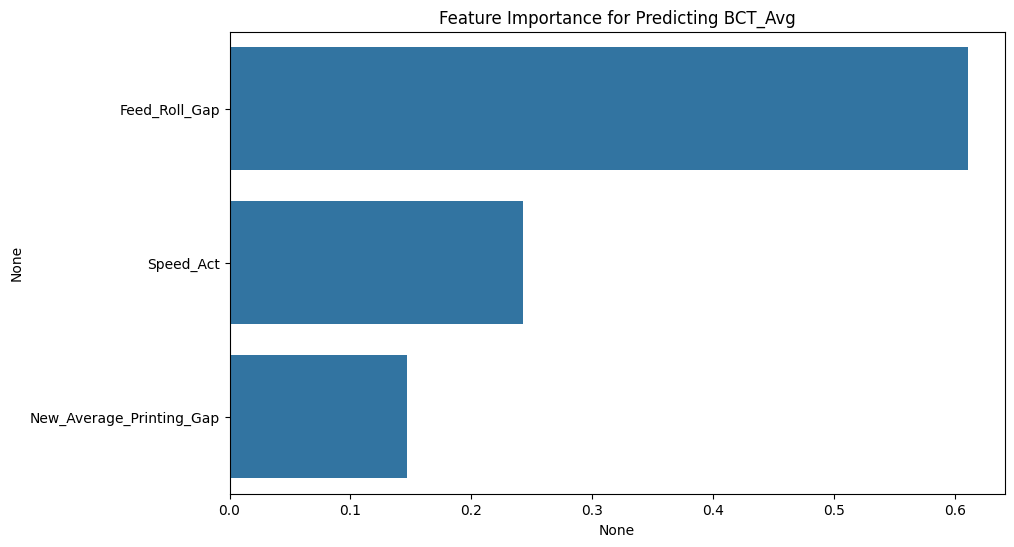

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest model to see feature importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(df[key_features], df['BCT_Avg'])

# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=key_features)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance for Predicting BCT_Avg')
plt.show()
